In [1]:
%reload_ext postcell
%postcell register

PostCell loaded
Loading config file from /Users/amt/Documents/GitHub/lectures/postcell.conf
Registered user Aman_Monolbaev at https://postcell.io/post_cell


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Numpy

Numpy is a matrix/linear algebra library for Python. In _core_ Python (Python without external libraries), working with collection of numbers requires the use of loops, list comprehensions or map/filter/reduce functions. However, in Numpy, collections of numbers are the default and easy to work with.

Extremely helpful cheatsheet on numpy: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf (check the web, there are many more)

Let's take a look at some examples

In [3]:
%matplotlib inline
#plt.figure(figsize=(50,50))
np.random.seed(seed=42)

In [4]:
a = np.array([1,2,3,4,5,6,7,8,9])
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
b = np.array([9,8,7,6,5,4,3,2, 1])
b

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [6]:
a + b

array([10, 10, 10, 10, 10, 10, 10, 10, 10])

In [7]:
a - b

array([-8, -6, -4, -2,  0,  2,  4,  6,  8])

In [8]:
b - a

array([ 8,  6,  4,  2,  0, -2, -4, -6, -8])

In [9]:
a * b

array([ 9, 16, 21, 24, 25, 24, 21, 16,  9])

Notice that we are able to add the whole array, just by using normal arithmetic functions. No need to use loops!

Recall that attempting to add two Python lists just concatenates them:

In [10]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

**Exercise** Create array `c` of 5 values, another `d` of 5 values
1. Add them
2. Subtract them
3. Multiply them

%%postcell exercise_045_b

c=np.array([1,2,3,6,5,4,3,2, 1])
d=np.array([9,8,7,6,5,4,3,2, 1])#type your answer here

In [12]:
c+d

NameError: name 'c' is not defined

### Numerical programming in Python

In the early 90s, some programmers wanted to use Python for their scientific work, but couldn't do so for several reasons:
1. Python is extremely slow[1], compared to faster languages. Numpy mitigates this problem by compiling important code in C, but exposing a Python API
2. Numeric code, which can consist of multi-dimensional matrices, had no counterpart in Python. As we have seen above, Numpy can handle an array of numbers just fine (later we will see examples of multiple dimensions)
3. Python, at the time, had no collection of high quality functions to operate on arrays or matrices of numbers. Numpy is that collection of numbers.


[1] https://benchmarksgame-team.pages.debian.net/benchmarksgame/performance/nbody.html


#### Quick performance comparison between core Python and numpy

In [13]:
%%postcell exercise_045_a

#type your answer here

Cell posted for evaluation


#### Boolean Indexing
Values can also be selected using boolean operators (somewhat like SQL's where clause).

In the example below, we generate an array of 10 values, a handful of specific values:

In [14]:
ten_vals = np.random.random((10,))
ten_vals

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [15]:
mask = [ True, False, False,  False,  False,  False, False, False,  False, False]
ten_vals[mask]

array([0.37454012])

In [16]:
ten_vals[[ True, False, False,  False,  False,  False, False, False,  False, False]]

array([0.37454012])

In [17]:
ten_vals[[ True, True, False,  False,  False,  False, False, False,  False, False]]

array([0.37454012, 0.95071431])

In [18]:
ten_vals[[ True, True, False,  False,  False,  False, False, False,  True, True]]

array([0.37454012, 0.95071431, 0.60111501, 0.70807258])

Recall from an earlier section that we can generate a vector of booleans with a simple comparison operator

In [19]:
ten_vals > .5

array([False,  True,  True,  True, False, False, False,  True,  True,
        True])

**important** we can combine boolean indexing and comparison operator to come up with an extremely common usage pattern

In [20]:
ten_vals

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [21]:
ten_vals[ten_vals > .5]

array([0.95071431, 0.73199394, 0.59865848, 0.86617615, 0.60111501,
       0.70807258])

In [22]:
ten_vals[ten_vals <= .5]

array([0.37454012, 0.15601864, 0.15599452, 0.05808361])

We were just able to query numpy, almost as if it was an sql table! All we did was combine two simple features of numpy.

You can even combine several boolean expressions, like a normal sql statement. However, keep in mind that when you combine them, you can't just use Python's _and_ and _or_ operators. You have to use `&` for _and_ and `|` for _or_. You also have to wrap multiple boolean statements within parenthesis.

In [23]:
ten_vals[(ten_vals > .1) & (ten_vals < .9)]

array([0.37454012, 0.73199394, 0.59865848, 0.15601864, 0.15599452,
       0.86617615, 0.60111501, 0.70807258])

In [24]:
ten_vals[(ten_vals < .1) | (ten_vals > .9)]

array([0.95071431, 0.05808361])

**Exercise** From the array `np.random.random((25))`, find all values between .1 and .5 (inclusive)

In [25]:
%%postcell exercise_045_c

#type your answer here

Cell posted for evaluation


### Columns of data as a matrix

Take a look at the table of numbers below:

In [26]:
grades = np.array([[72, 89, 14],
 [43, 65, 74],
 [38, 71, 62],
 [82, 66, 49],
 [31, 95, 65],
 [42, 58, 51],
 [15, 54, 85],
 [60, 21, 15],
 [79, 23, 58],
 [63, 87, 67]])
grades

array([[72, 89, 14],
       [43, 65, 74],
       [38, 71, 62],
       [82, 66, 49],
       [31, 95, 65],
       [42, 58, 51],
       [15, 54, 85],
       [60, 21, 15],
       [79, 23, 58],
       [63, 87, 67]])

These numbers represent grades of 10 students (each is out of a hundred). The first two are assignments and the last is the final exam.

**Exercise** Show all grades for the first assignment (use the slicing syntax we have used often)

In [27]:
%%postcell exercise_045_d

#type your answer here

Cell posted for evaluation


### Dot product

What is the final grade when only the first assignment is considered?

In [28]:
grades.dot([0,0,1])

array([14, 74, 62, 49, 65, 51, 85, 15, 58, 67])

In [29]:
grades.dot([0,1,0])

array([89, 65, 71, 66, 95, 58, 54, 21, 23, 87])

In [30]:
grades.dot([1,0,0])

array([72, 43, 38, 82, 31, 42, 15, 60, 79, 63])

In [31]:
np.dot(grades, [1, 0, 0])

array([72, 43, 38, 82, 31, 42, 15, 60, 79, 63])

In [32]:
grades @ [1, 0, 0]

array([72, 43, 38, 82, 31, 42, 15, 60, 79, 63])

Notice that this is the same as using slicing syntax to get the first row. Using the dot product, we are saying, _get 100% of the first column and zero percent of the second and third column_

What is the final grade is assignments 1 and 2 are considired equally and the final exam is ignored (so the first column contributes half and the second column contributes half)?

In [33]:
grades.dot([.5, .5, 0])

array([80.5, 54. , 54.5, 74. , 63. , 50. , 34.5, 40.5, 51. , 75. ])

In [34]:
np.dot(grades, [.5, .5, 0])

array([80.5, 54. , 54.5, 74. , 63. , 50. , 34.5, 40.5, 51. , 75. ])

The following array represents the final grade for each student (think of this as a vertical array, with 47.25 at the top and 71 at the bottom, might make it easier to visualize)

In [35]:
final_grade = np.array([47.25, 64., 58.25, 61.5, 64., 50.5, 59.75, 27.75, 54.5 ,71.])
final_grade

array([47.25, 64.  , 58.25, 61.5 , 64.  , 50.5 , 59.75, 27.75, 54.5 ,
       71.  ])

What if you are the professor and already know the final grade for each student (from a previous quarter), but have forgotton how you weighed the assignments and the final grade? How can you figure out the parameters for the dot product function?

In [36]:
np.linalg.lstsq(grades, final_grade, rcond=None)[0]

array([0.25, 0.25, 0.5 ])

In [37]:
grades.dot([0.25, 0.25, 0.5 ])

array([47.25, 64.  , 58.25, 61.5 , 64.  , 50.5 , 59.75, 27.75, 54.5 ,
       71.  ])

The above method tells us that the first two assignments contributed 25% to the final grade and the last value contributed 50%!

### A picture as a matrix
A black and white image is essentailly a matrix. Each pixel corresponds to a cell in a matrix and the value in that cell corresponds to how dark or light the pixel is.

Color images can be broken down into red, blue and green matrices (so a 3-dimensional matrix), but we'll hold off on such matrices for now.

In [38]:
image = plt.imread("images/chicago.png")

In [39]:
type(image)

numpy.ndarray

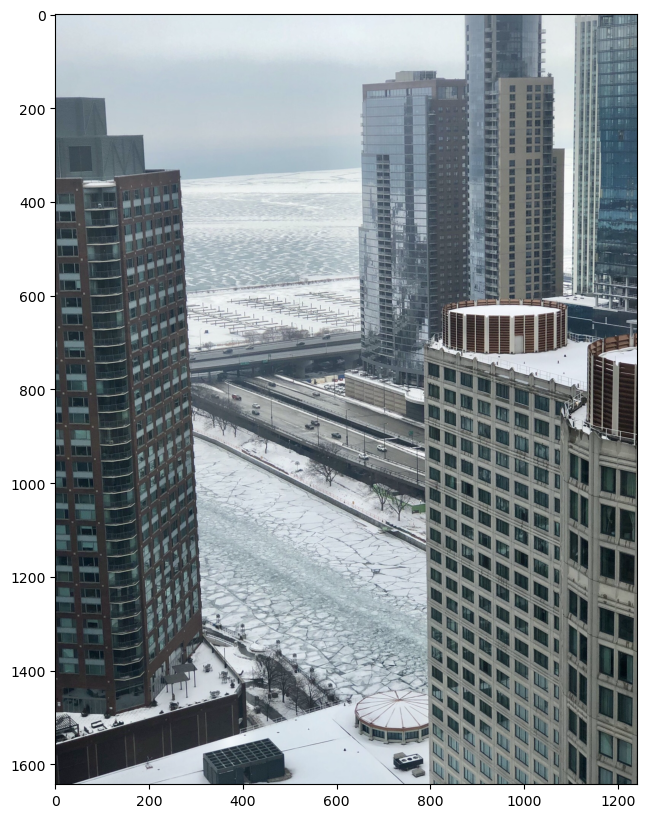

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [43]:
image.shape

(1643, 1242, 3)

Confession: the red, green and blue images below are a bit fake. Once we extract a single color channel, matplotlib just sees it as a grascale image. We have to force it to display that image in the color we want.

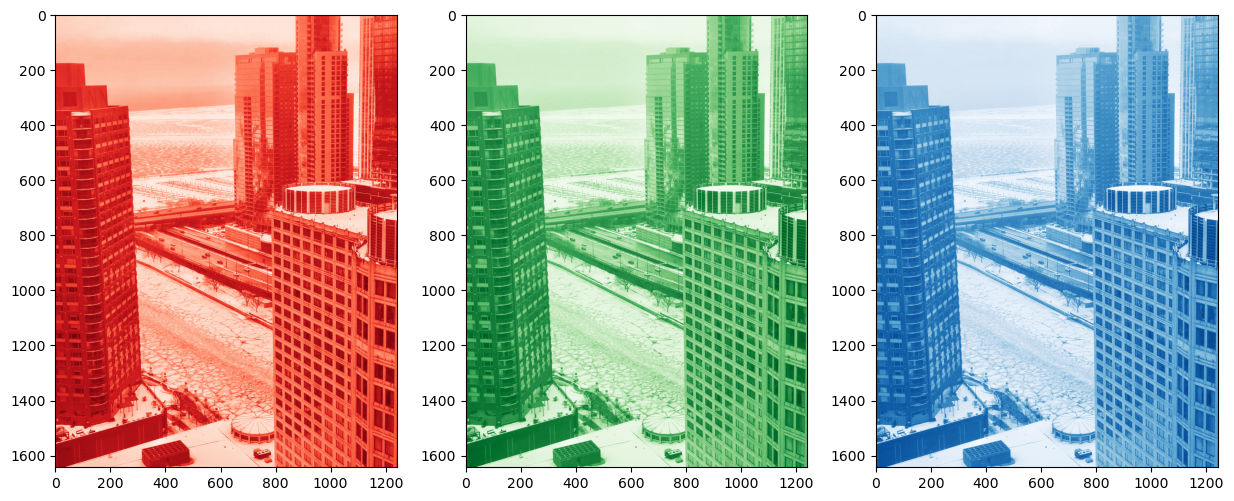

In [42]:
fix, axes = plt.subplots(1,3, figsize=(15,13))

axes[0].imshow(image[:, :, 0], cmap="Reds_r")
axes[1].imshow(image[:, :, 1], cmap="Greens_r")
axes[2].imshow(image[:, :, 2], cmap="Blues_r")
plt.show()

In [ ]:
image

According to [Wikipedia](https://en.wikipedia.org/wiki/Grayscale), a standard ratio to convert color images to black & white is:

$Y'=0.299R'+0.587G'+0.114B'$

In [53]:
chicagobw = np.dot(image, [0.299, 0.587, 0.114])

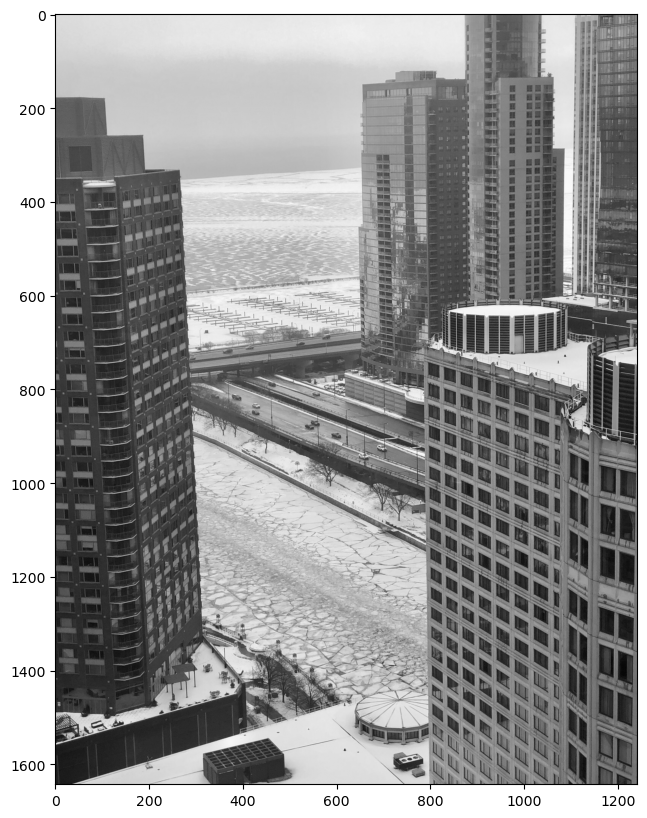

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(chicagobw, cmap="gray")
plt.show()

In [55]:
chicagobw.shape

(1643, 1242)

**Example**
 Get rid of the building on the left (it looks slanted!!)

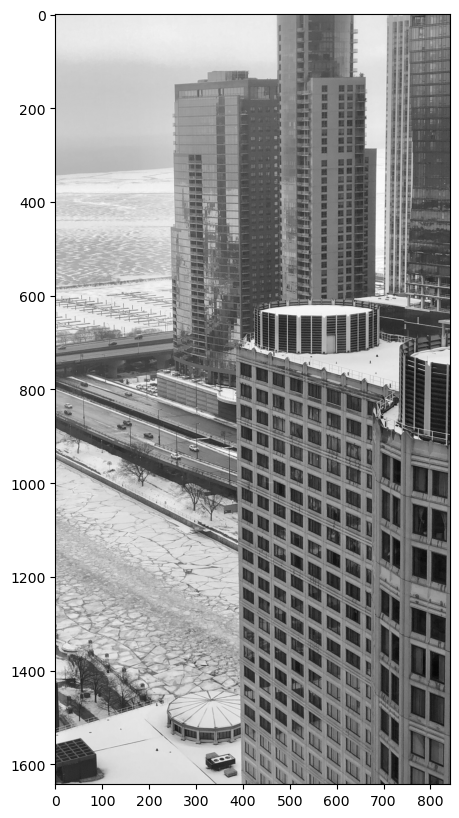

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(chicagobw[:, 400:], cmap="gray")
plt.show()

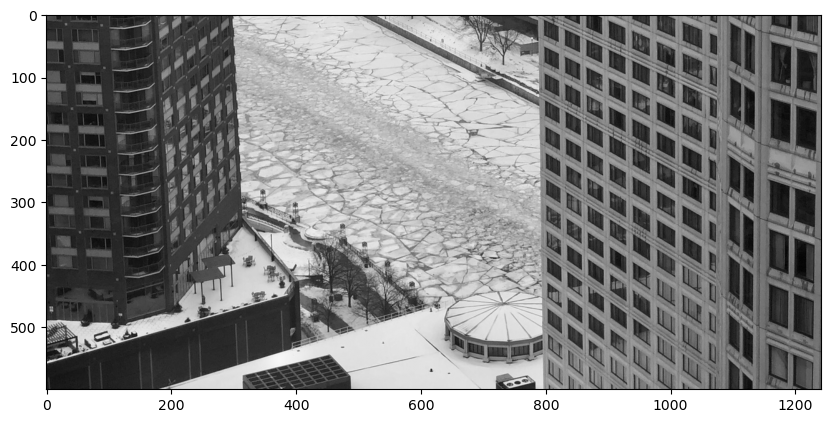

In [57]:
#### Forget the buildings, zoom in on the cracked ice, say height 1000-1600

plt.figure(figsize=(10,10))
plt.imshow(chicagobw[1000:1600, :], cmap="gray")
plt.show()

**Exercise** Where is the _origin_ (0,0), lower left corner, upper left corner, lower right corner, upper right corner or the middle of the image?

**Exercise** Zoom in to the pair of awnings in front of the building on the left.

In [58]:
%%postcell exercise_045_e

#type your answer here

Cell posted for evaluation


**Exercise** Zoom in to the circular structure near the bottom of the photo, next to the building on the right


In [ ]:
%%postcell exercise_045_f

#type your answer here

**Exercise** See if your professor will let you use Numpy in your linear algebra class

### Broadcasting
Numpy provides a fantastic utility by allowing you to do math on matrices which are not the right dimensions. 

In classical math text books, it makes no sense to add a matrix and a scalar. Numpy makes it trivial:

In [59]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [60]:
np.ones((5,5)) + 1

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

A matrix and a vector can also be added:

In [61]:
np.ones((5,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [62]:
np.ones((5,5)) + np.ones((5,1))

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

See this web page for an explanation and diagrams: https://numpy.org/devdocs/user/theory.broadcasting.html

### Common numpy functions

**`arange`**

Similar to Python's `range` function, create a list of numbers, between 10 and 30

In [63]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
np.arange(10, 30)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

Create the same as above, but show every third number

In [65]:
np.arange(10.5, 30, 3.34)

array([10.5 , 13.84, 17.18, 20.52, 23.86, 27.2 ])

**`linspace`**

Create a list of linearly spaced numbers between a `start` number and an `end` number (50, by default)

In [66]:
np.linspace(10, 100)

array([ 10.        ,  11.83673469,  13.67346939,  15.51020408,
        17.34693878,  19.18367347,  21.02040816,  22.85714286,
        24.69387755,  26.53061224,  28.36734694,  30.20408163,
        32.04081633,  33.87755102,  35.71428571,  37.55102041,
        39.3877551 ,  41.2244898 ,  43.06122449,  44.89795918,
        46.73469388,  48.57142857,  50.40816327,  52.24489796,
        54.08163265,  55.91836735,  57.75510204,  59.59183673,
        61.42857143,  63.26530612,  65.10204082,  66.93877551,
        68.7755102 ,  70.6122449 ,  72.44897959,  74.28571429,
        76.12244898,  77.95918367,  79.79591837,  81.63265306,
        83.46938776,  85.30612245,  87.14285714,  88.97959184,
        90.81632653,  92.65306122,  94.48979592,  96.32653061,
        98.16326531, 100.        ])

Create 10 linearly spaced numbers, between 25 and 55

In [67]:
np.linspace(25, 55, 10)

array([25.        , 28.33333333, 31.66666667, 35.        , 38.33333333,
       41.66666667, 45.        , 48.33333333, 51.66666667, 55.        ])

**`ones`, `zeros`**

In [68]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [69]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [70]:
np.zeros((3,5)) + 27

array([[27., 27., 27., 27., 27.],
       [27., 27., 27., 27., 27.],
       [27., 27., 27., 27., 27.]])

**Identity matrix**

In [71]:
np.eye(5,5) #<= notice there are two arguments, not a single tuple

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [72]:
np.eye((5,5)) 

TypeError: 'tuple' object cannot be interpreted as an integer

In [73]:
np.zeros(3,5)

TypeError: Cannot interpret '5' as a data type

**`transpose`**

In [74]:
arr = np.array([[1,2,3,4], [5,6,7,8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [75]:
arr.T #<== convertrs rows to columns

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

**Display as an image**

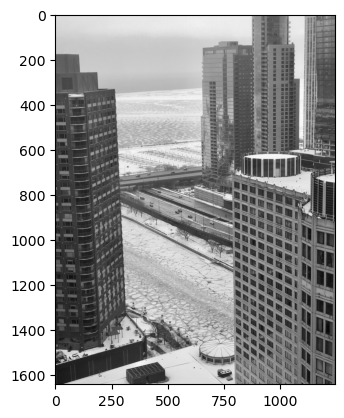

In [76]:
plt.imshow(chicagobw, cmap="gray")
plt.show()

**Exercise** Rotate the image by 90 degrees

In [77]:
%%postcell exercise_045_g

#type your answer here

Cell posted for evaluation


**Aggregation**

In [78]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [79]:
arr.min()

np.int64(1)

In [80]:
arr.max()

np.int64(12)

Sum all columns

In [81]:
arr.sum()

np.int64(78)

In [82]:
arr.sum(axis=1)

array([10, 26, 42])

In [83]:
arr.sum(axis=0)

array([15, 18, 21, 24])

Note that many methods on vectors and matrices can also be called via `np.`

In [85]:
np.sum(arr)

np.int64(78)

Notice that you can do unexpectedly complex calculation without using loops

In [86]:
cost_of_parts = np.random.randint(0, 100, 5)
cost_of_parts

array([21, 52,  1, 87, 29])

In [87]:
percent_of_total = list()
total = cost_of_parts.sum()

for p in cost_of_parts:
    percent_of_total.append(p/total)

np.array(percent_of_total)

array([0.11052632, 0.27368421, 0.00526316, 0.45789474, 0.15263158])

In [88]:
percent_of_total = cost_of_parts / cost_of_parts.sum() 
percent_of_total

array([0.11052632, 0.27368421, 0.00526316, 0.45789474, 0.15263158])

In [89]:
percent_of_total.sum()

np.float64(1.0)

**Exercise** Recall the vector `ten_vals` from above, how many values are above 0.5 (recall that `True` corresponds to `1` and `False` corresponds to `0`)? You can recreate `ten_vals` via `np.random.random(10)`.

In [90]:
%%postcell exercise_045_h

#type your answer here

Cell posted for evaluation


In some instances, particularly time series, you need to calculate a running _sum_ or _prod_

In [91]:
np.array([1,2,3,4,5,6,7,8,9])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
np.array([1,2,3,4,5,6,7,8,9]).cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45])

**`reshape`, `flatten`**

In [93]:
arr = np.array([0,1,2,3,4,5,6,7,8,9])
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
arr.reshape((2,5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [95]:
arr.reshape((5,2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [98]:
arr.reshape((5,3)) #<=== Why can't we do this?

ValueError: cannot reshape array of size 10 into shape (5,3)

In [99]:
arr = np.array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
arr.flatten()

In [ ]:
image.flatten().shape

Common mistake

In [ ]:
arr = np.array([[1,2,3,4,5,6,7,8,9,0]])
arr #notice the double brackets

In [ ]:
arr.flatten() #notice the single brackets

**Combine arrays: `hstack`, `vstack`**

In [ ]:
ones = np.ones((1,5))
ones

In [ ]:
arr = np.random.randint(0,100, (5,5))
arr

In [ ]:
np.vstack((ones, arr))

In [ ]:
np.hstack((ones.T,arr))